<a href="https://colab.research.google.com/github/Cann-Emma/R/blob/main/Penguin_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##ANALYSIS OF PALMER ARCHIPELAGO PENGUINS
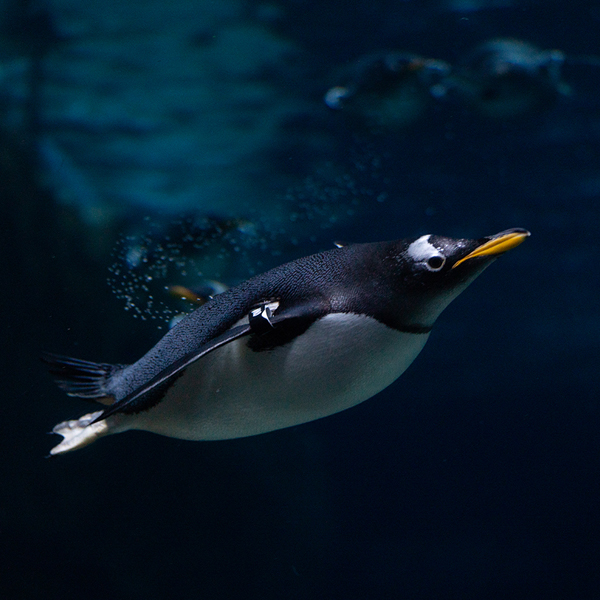



#Dataset Background and Description

This data summarizes Antarctic penguins, giving us data on species, sex culmen length and depth, flipper length, body mass, and their location in Palmer Archipelago. This dataset originally  has 344 observations and 17 variables, here is a description of the relevant variables:


*   Species: Chinstrap, Adélie, or Gentoo
*   Culmen Length: culmen length in millimeter(mm)
*  Culmen Depth: culmen depth in millimeter (mm)
*   Flipper Length: flipper length in millimeter (mm)
*   Body Mass: body mass in grams (g) but converted into pounds(lbs)
*   Island: Dream, Torgersen, or Biscoe
*   Sex: Female or Male


**References**

Dataset: https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data

Data Visualization: https://r-graph-gallery.com/


 # Load Libraries & Data


In [3]:
install.packages('caret')
install.packages('ggplot2')
install.packages('RColorBrewer')
install.packages('readr')
install.packages('dplyr')
library(dplyr)
library(caret)
library(ggplot2)
library(RColorBrewer)
library(readr)
penguin <- read.csv("penguins.csv")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
install.packages('car')
library(car)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode




# Data Preparation and Summary

Original Dataset 344 observations, 17 variables( 8 numeric, 9 categorical)

For each part of the project I created a new data or made some modifications to existing ones. Some modifications include:



*   Subseting relevant variables
*   Removing observations with missing values or ambiguous observations(.)


*   Creating a new column that converted body mass from grams to pounds
* Recoding the species types to remove the scientific names


*   Renaming Flipper Length, Culmen Depth, and Culmen Length to avoid mistakes


At the end of data cleaning, there were 333 observations and 8 variables(5 numeric, 3 categorical)


In [ ]:
# Taking a look at original dataset
glimpse(penguin)

Rows: 344
Columns: 17
$ studyName           <chr> "PAL0708", "PAL0708", "PAL0708", "PAL0708", "PAL07…
$ Sample.Number       <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,…
$ Species             <chr> "Adelie Penguin (Pygoscelis adeliae)", "Adelie Pen…
$ Region              <chr> "Anvers", "Anvers", "Anvers", "Anvers", "Anvers", …
$ Island              <chr> "Torgersen", "Torgersen", "Torgersen", "Torgersen"…
$ Stage               <chr> "Adult, 1 Egg Stage", "Adult, 1 Egg Stage", "Adult…
$ Individual.ID       <chr> "N1A1", "N1A2", "N2A1", "N2A2", "N3A1", "N3A2", "N…
$ Clutch.Completion   <chr> "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "No", "N…
$ Date.Egg            <chr> "11/11/07", "11/11/07", "11/16/07", "11/16/07", "1…
$ Culmen.Length..mm.  <dbl> 39.1, 39.5, 40.3, NA, 36.7, 39.3, 38.9, 39.2, 34.1…
$ Culmen.Depth..mm.   <dbl> 18.7, 17.4, 18.0, NA, 19.3, 20.6, 17.8, 19.6, 18.1…
$ Flipper.Length..mm. <int> 181, 186, 195, NA, 193, 190, 181, 195, 193, 190, 1…
$ Body.Mass..g.   

In [5]:
# Selecting variables of interest
penguin1= penguin%>%select(Species,Island,Culmen.Length..mm.,Culmen.Depth..mm.,Flipper.Length..mm.,Body.Mass..g., Sex)
penguin1= penguin1[complete.cases(penguin1),]
penguin1= penguin1%>%mutate(Mass= Body.Mass..g.*0.0022)
penguin1= penguin1[-c(8:11, 47, 246, 286, 324, 336),]

In [21]:
# Clean Dataset
glimpse(penguin1)

Rows: 333
Columns: 8
$ Species             <chr> "Adelie Penguin", "Adelie Penguin", "Adelie Pengui…
$ Island              <chr> "Torgersen", "Torgersen", "Torgersen", "Torgersen"…
$ Culmen.Length..mm.  <dbl> 39.1, 39.5, 40.3, 36.7, 39.3, 38.9, 39.2, 41.1, 38…
$ Culmen.Depth..mm.   <dbl> 18.7, 17.4, 18.0, 19.3, 20.6, 17.8, 19.6, 17.6, 21…
$ Flipper.Length..mm. <int> 181, 186, 195, 193, 190, 181, 195, 182, 191, 198, …
$ Body.Mass..g.       <int> 3750, 3800, 3250, 3450, 3650, 3625, 4675, 3200, 38…
$ Sex                 <chr> "MALE", "FEMALE", "FEMALE", "FEMALE", "MALE", "FEM…
$ Mass                <dbl> 8.250, 8.360, 7.150, 7.590, 8.030, 7.975, 10.285, …


In [ ]:
penguin1%>%group_by(Sex)%>%summarise(Mass= mean(Mass, na.rm=T))
penguin1%>%group_by(Island)%>%summarise(Mass= mean(Mass, na.rm=T))
penguin1%>%select(Species,Sex, Island)%>%table()
penguin1%>%group_by(Species)%>%summarise(Mass= mean(Mass, na.rm=T))

Sex,Mass
<chr>,<dbl>
FEMALE,8.49700
MALE,10.00051


Island,Mass
<chr>,<dbl>
Biscoe,10.382178
Dream,8.181585
Torgersen,8.158723


, , Island = Biscoe

                                           Sex
Species                                     FEMALE MALE
  Adelie Penguin (Pygoscelis adeliae)           22   22
  Chinstrap penguin (Pygoscelis antarctica)      0    0
  Gentoo penguin (Pygoscelis papua)             58   61

, , Island = Dream

                                           Sex
Species                                     FEMALE MALE
  Adelie Penguin (Pygoscelis adeliae)           27   28
  Chinstrap penguin (Pygoscelis antarctica)     34   34
  Gentoo penguin (Pygoscelis papua)              0    0

, , Island = Torgersen

                                           Sex
Species                                     FEMALE MALE
  Adelie Penguin (Pygoscelis adeliae)           24   23
  Chinstrap penguin (Pygoscelis antarctica)      0    0
  Gentoo penguin (Pygoscelis papua)              0    0


Species,Mass
<chr>,<dbl>
Adelie Penguin (Pygoscelis adeliae),8.153562
Chinstrap penguin (Pygoscelis antarctica),8.212794
Gentoo penguin (Pygoscelis papua),11.203361


In [ ]:
# Descriptive Statistics
summary(penguin1$Mass)
summary(penguin1$Culmen.Depth..mm.)
summary(penguin1$Culmen.Length..mm.)
summary(penguin1$Flipper.Length..mm.)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  5.940   7.810   8.910   9.256  10.505  13.860 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  13.10   15.60   17.30   17.16   18.70   21.50 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  32.10   39.50   44.50   43.99   48.60   59.60 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    172     190     197     201     213     231 

#Data Visualization


In [12]:
# Data Preparation to avoid a crowded or unaesthetic graph
penguin2= penguin1
penguin2$Species= dplyr::recode(penguin1$Species, "Adelie Penguin (Pygoscelis adeliae)"= "Adelie Penguin", "Chinstrap penguin (Pygoscelis antarctica)"= "Chinstrap penguin", "Gentoo penguin (Pygoscelis papua)"= "Gentoo penguin")

In [20]:
glimpse(penguin2)

Rows: 333
Columns: 8
$ Species             <chr> "Adelie Penguin", "Adelie Penguin", "Adelie Pengui…
$ Island              <chr> "Torgersen", "Torgersen", "Torgersen", "Torgersen"…
$ Culmen.Length..mm.  <dbl> 39.1, 39.5, 40.3, 36.7, 39.3, 38.9, 39.2, 41.1, 38…
$ Culmen.Depth..mm.   <dbl> 18.7, 17.4, 18.0, 19.3, 20.6, 17.8, 19.6, 17.6, 21…
$ Flipper.Length..mm. <int> 181, 186, 195, 193, 190, 181, 195, 182, 191, 198, …
$ Body.Mass..g.       <int> 3750, 3800, 3250, 3450, 3650, 3625, 4675, 3200, 38…
$ Sex                 <chr> "MALE", "FEMALE", "FEMALE", "FEMALE", "MALE", "FEM…
$ Mass                <dbl> 8.250, 8.360, 7.150, 7.590, 8.030, 7.975, 10.285, …


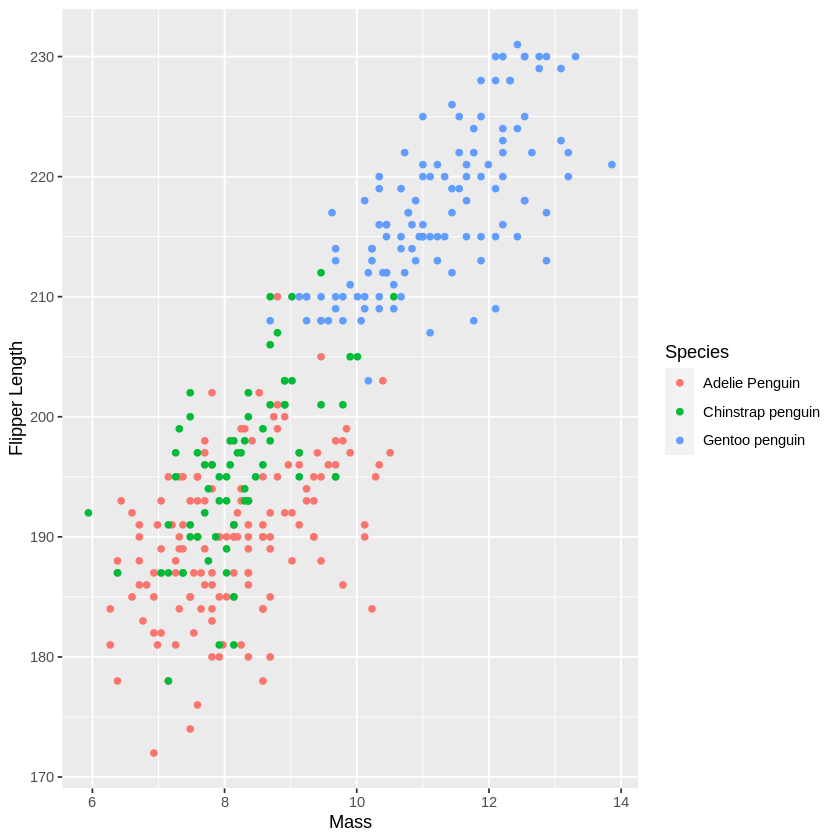

In [13]:
# Scatterplot: What is the correlation between Mass and Flipper Length and how do these vary across species?
penguin2%>%ggplot(aes(x= Mass, y= Flipper.Length..mm., color= Species))+geom_point()+labs(x= 'Mass', y= 'Flipper Length')

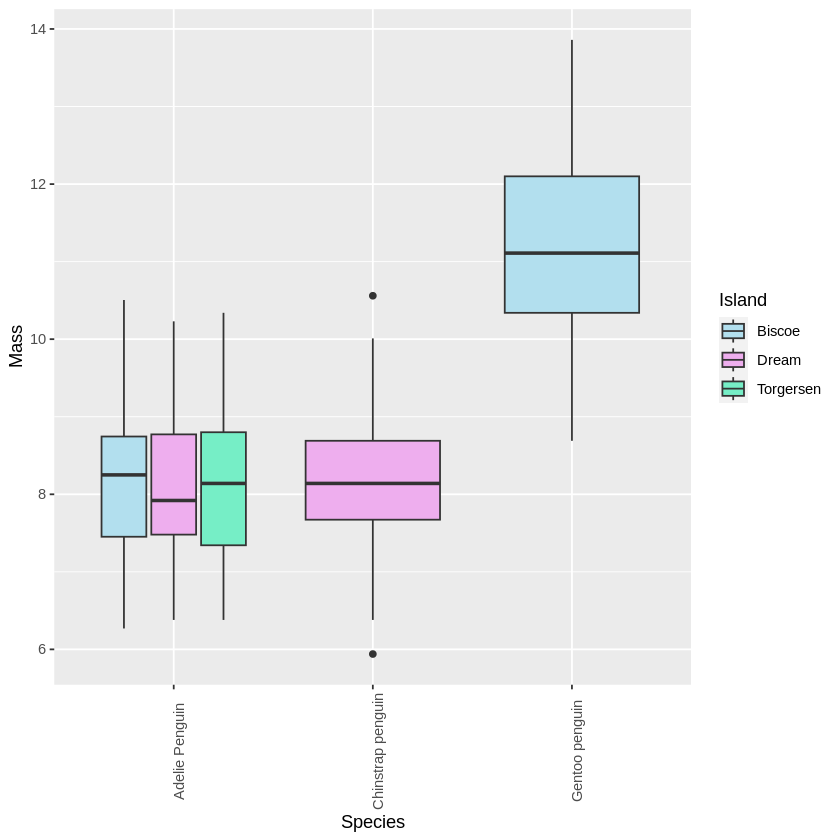

In [14]:
# Box Plot: What is the distribution of Mass across Species and Island
penguin2%>%ggplot(aes(x= Species, y= Mass, fill= Island))+geom_boxplot()+scale_fill_manual(values = c("lightblue2", "plum2", "aquamarine2"))+theme(axis.text.x = element_text(angle= 90))

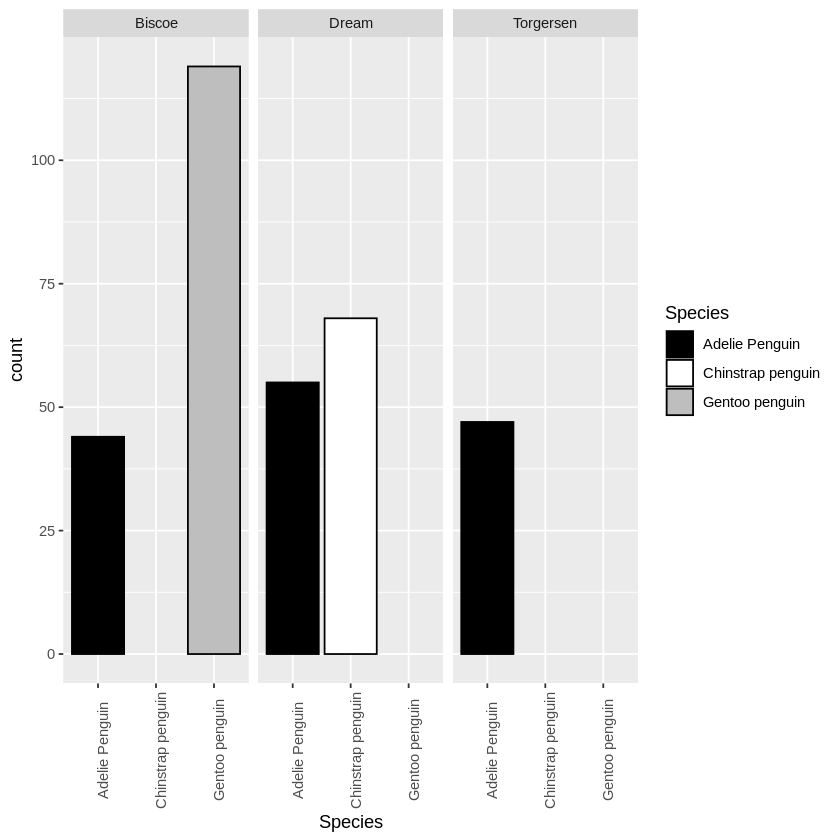

In [15]:
# Bar Graph: How many of each Species are on each island?
penguin2%>%ggplot(aes(x= Species, fill=Species))+geom_bar(color= "black")+facet_wrap(~Island)+theme(axis.text.x = element_text(angle= 90))+scale_fill_manual(values= c("black", "white", "gray"))

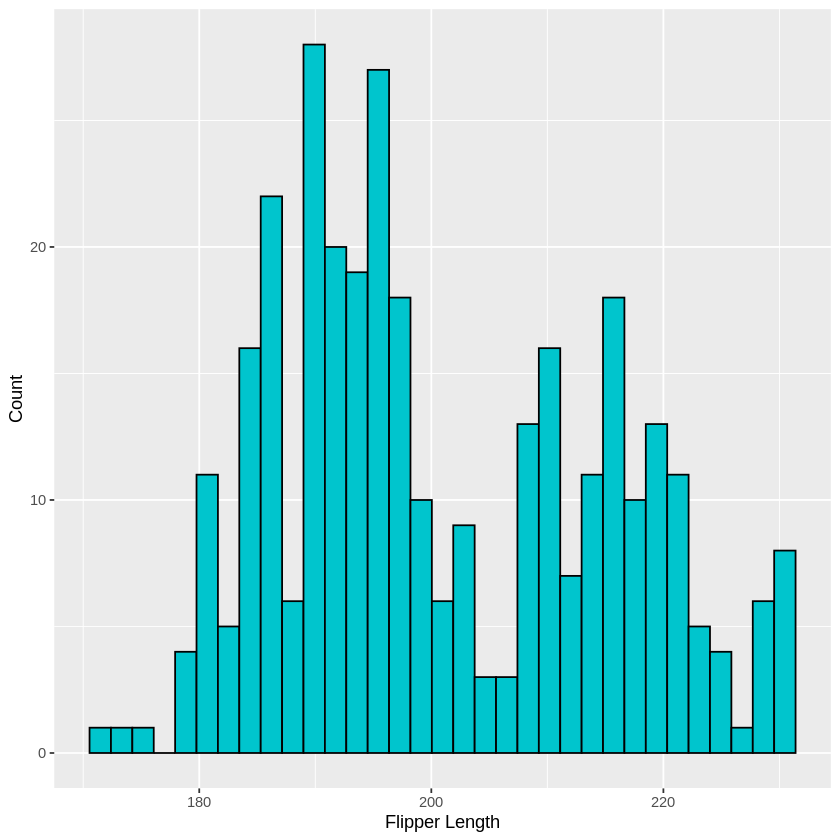

In [16]:
# Histogram: What is the distribution of Flipper Length?
penguin2%>%ggplot(aes(x= Flipper.Length..mm.))+geom_histogram(bins=33, fill= "turquoise3", color= "black")+labs(y= 'Count', x= 'Flipper Length')

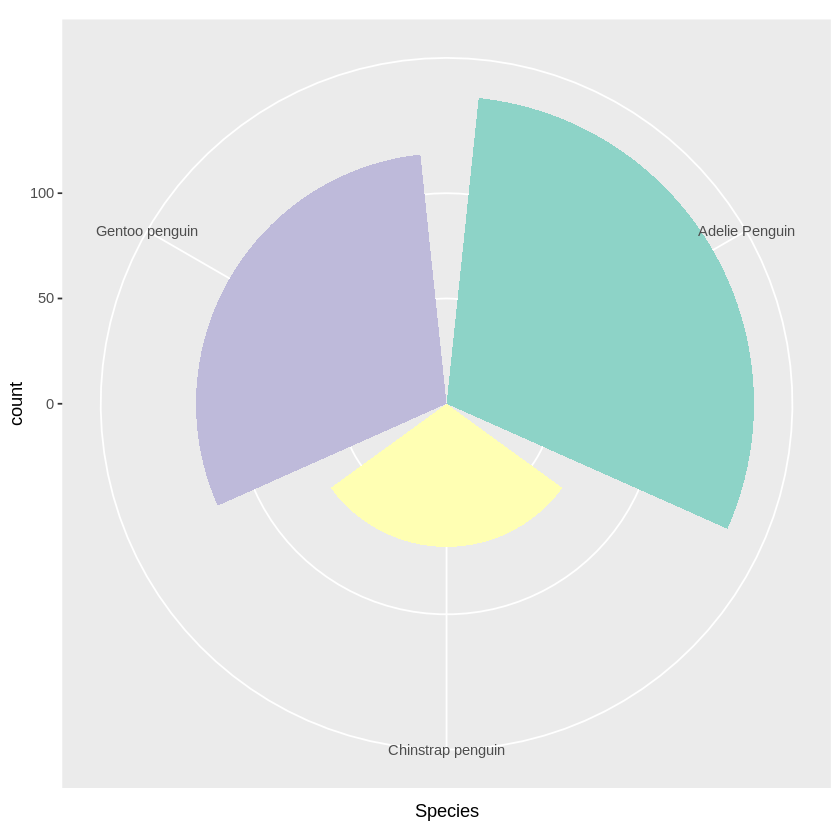

In [17]:
# Polar Coordinates: Species distribution
penguin2%>%ggplot(aes(x=Species))+geom_bar(fill= brewer.pal(3, "Set3"))+coord_polar()

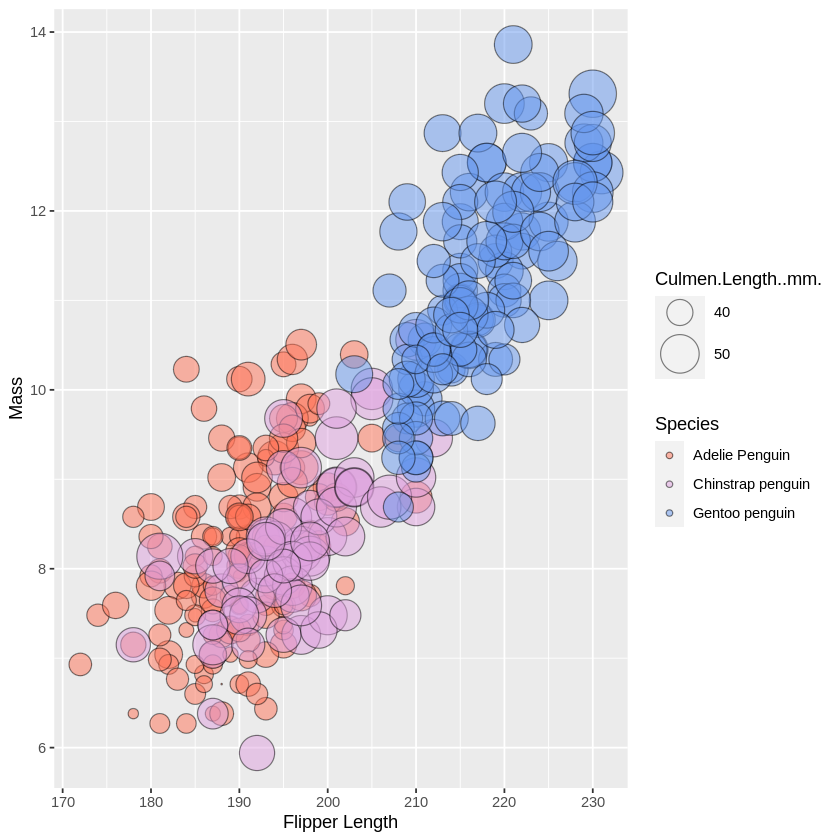

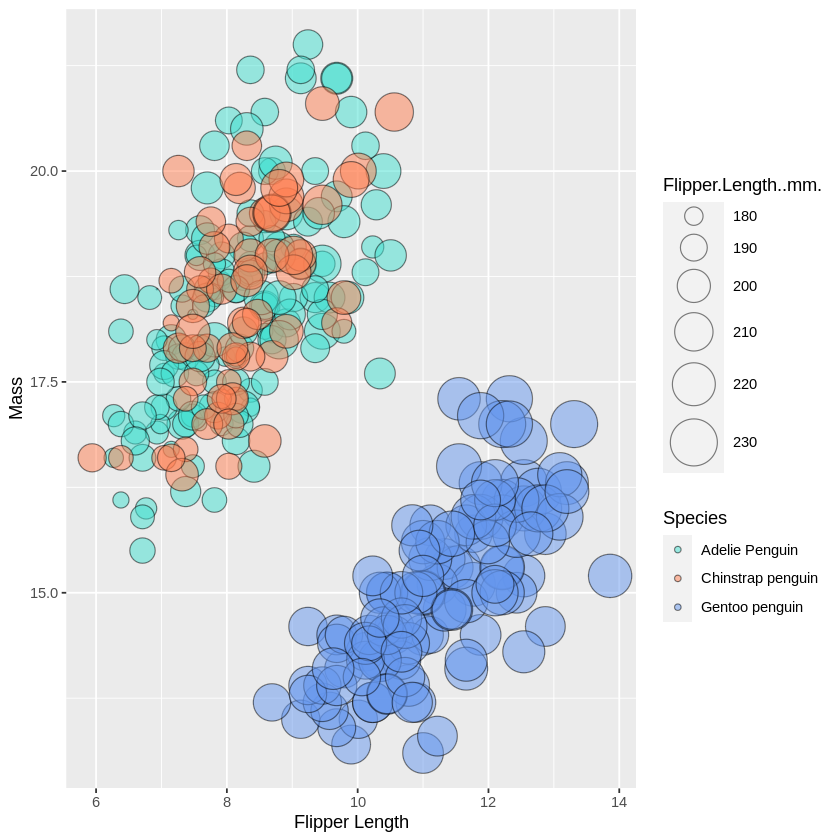

In [18]:
# Bubble Plot: How does mass vary across variables?
penguin2%>%ggplot(aes(x= Flipper.Length..mm.  , y= Mass, size= Culmen.Length..mm., fill= Species))+geom_point(alpha= 0.5, shape= 21)+ scale_size(range= c(0.1, 13))+ scale_fill_manual(values= c("coral1", "plum", "cornflowerblue"))+labs(y= 'Mass', x= 'Flipper Length')
penguin2%>%ggplot(aes(x= Mass  , y= Culmen.Depth..mm., size= Flipper.Length..mm., fill= Species))+geom_point(alpha= 0.5, shape= 21)+ scale_size(range= c(0.1, 13))+ scale_fill_manual(values= c("turquoise", "coral", "cornflowerblue"))+labs(y= 'Mass', x= 'Flipper Length')

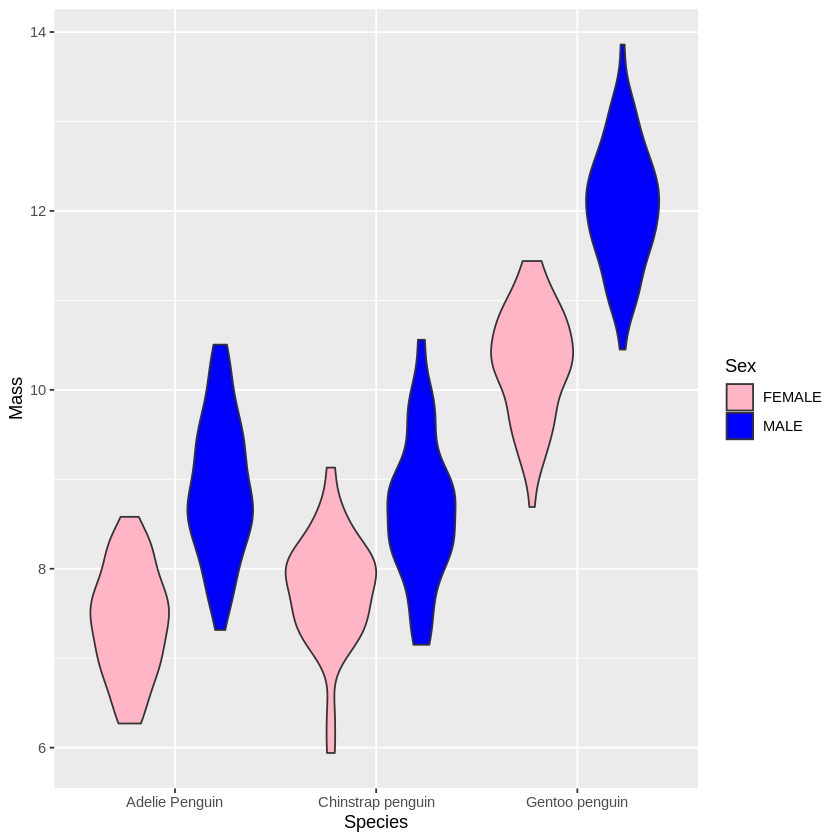

In [19]:
# Violin Graph: Mass distribution by Specie and Sex
penguin2%>%ggplot(aes(x= Species, y= Mass, fill=Sex))+geom_violin()+scale_fill_manual(values= c("pink1", "blue1"))

# Regression


*   Multiple Regression Model: The mass of a penguin is predicted by Culmen Depth, Culmen Length,and Flipper Length
*  Logistic Regression Model: The sex of a penguin is predicted by Flipper Length, Culmen Depth, and Mass



In [ ]:
# Preparing Data for Regression Analysis
penguin3= select(penguin1, Culmen.Depth..mm., Culmen.Length..mm., Mass, Flipper.Length..mm.)
penguin3= penguin3%>%rename(Culmen.Depth= Culmen.Depth..mm., Culmen.Length=Culmen.Length..mm., Flipper.Length= Flipper.Length..mm. )

In [ ]:
# Checking for concerns about Multicollinearity with Correlation Matrix
peng_matrix= cor(penguin3)
peng_matrix

,Culmen.Depth,Culmen.Length,Mass,Flipper.Length
Culmen.Depth,1.0000000,-0.2286256,-0.4720157,-0.5777917
Culmen.Length,-0.2286256,1.0000000,0.5894511,0.6530956
Mass,-0.4720157,0.5894511,1.0000000,0.8729789
Flipper.Length,-0.5777917,0.6530956,0.8729789,1.0000000


In [ ]:
# Multiple Regression Model
pengmod1= train(Mass~., penguin3, method= "lm")
summary(pengmod1)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.31302 -0.62591 -0.04481  0.53026  2.82373 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -14.180047   1.245486 -11.385   <2e-16 ***
Culmen.Depth     0.039240   0.030417   1.290    0.198    
Culmen.Length    0.007244   0.011805   0.614    0.540    
Flipper.Length   0.111677   0.005494  20.327   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8646 on 329 degrees of freedom
Multiple R-squared:  0.7639,	Adjusted R-squared:  0.7618 
F-statistic: 354.9 on 3 and 329 DF,  p-value: < 2.2e-16


In [ ]:
pengmodAIC= train(Mass~., penguin3, method= "lmStepAIC", direction= "both", trace= F)
summary(pengmodAIC)


Call:
lm(formula = .outcome ~ Culmen.Depth + Flipper.Length, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.26960 -0.60016 -0.04998  0.53045  2.82217 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -14.382715   1.199766 -11.988   <2e-16 ***
Culmen.Depth     0.043732   0.029495   1.483    0.139    
Flipper.Length   0.113887   0.004144  27.481   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8638 on 330 degrees of freedom
Multiple R-squared:  0.7637,	Adjusted R-squared:  0.7622 
F-statistic: 533.2 on 2 and 330 DF,  p-value: < 2.2e-16


In [ ]:
# Testing Multiple Regression Model
predpeng= data.frame(Flipper.Length= 209,Culmen.Depth= 9, Culmen.Length= 45)
predict(pengmodAIC, predpeng)

1 
9.813324

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


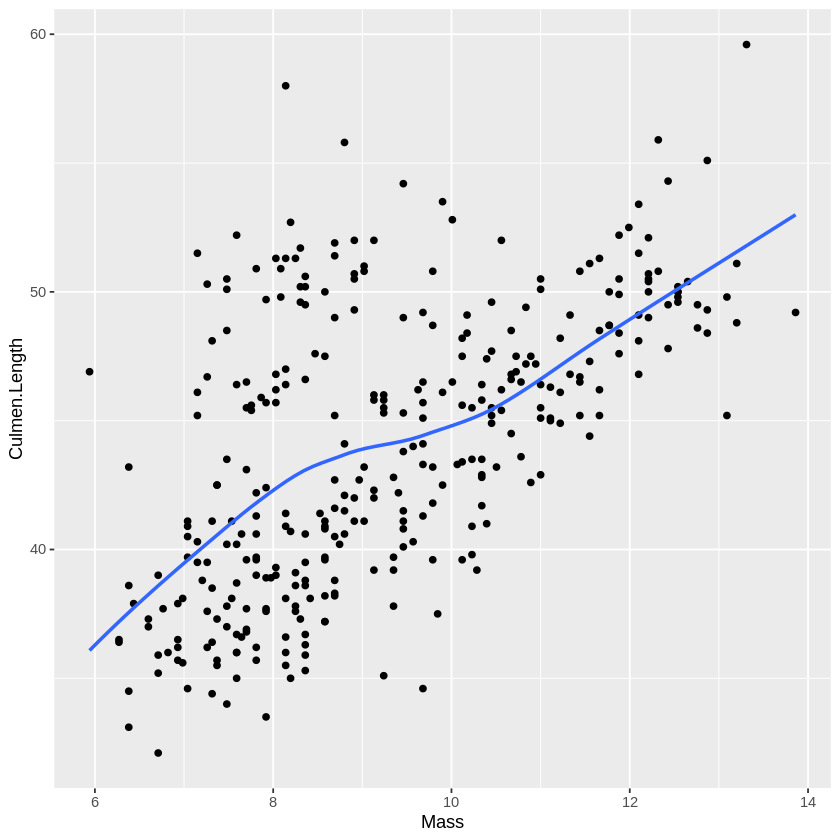

In [ ]:
penguin3%>%ggplot(aes(x= Mass, y= Culmen.Length))+geom_point( ) +geom_smooth(se= F)

In [ ]:
# Logistic Regression
penguin2.5= penguin1%>%select(Flipper.Length..mm., Culmen.Depth..mm. ,Mass, Sex)
penguin2.5= penguin2.5%>%rename(Culmen.Depth= Culmen.Depth..mm., Flipper.Length= Flipper.Length..mm.)
penglog= train(Sex~., penguin2.5, method= "glm", family= "binomial")
summary(penglog)


Call:
NULL

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -56.284304   8.140157  -6.914 4.70e-12 ***
Flipper.Length  -0.003154   0.031713  -0.099    0.921    
Culmen.Depth     2.022156   0.240008   8.425  < 2e-16 ***
Mass             2.419684   0.355642   6.804 1.02e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 461.61  on 332  degrees of freedom
Residual deviance: 164.33  on 329  degrees of freedom
AIC: 172.33

Number of Fisher Scoring iterations: 7


In [ ]:
exp(coef(penglog$finalModel))

(Intercept) Flipper.Length   Culmen.Depth           Mass 
  3.597804e-25   9.968512e-01   7.554594e+00   1.124231e+01

In [ ]:
# Testing Logistic Regression Model
predpenglog= data.frame(Culmen.Depth= 19, Culmen.Length= 45, Flipper.Length= 209, Mass= 9.81)
predict(penglog, predpenglog)

[1] MALE
Levels: FEMALE MALE

# Classification

In [ ]:
penguin4= penguin1%>%select(Culmen.Length..mm.,Culmen.Depth..mm.,Flipper.Length..mm., Mass, Island, Species, Sex)
penguin4= penguin4%>%rename(Culmen.Depth= Culmen.Depth..mm., Culmen.Length=Culmen.Length..mm., Flipper.Length= Flipper.Length..mm.)
pengmodknn= train(Species~Culmen.Depth+Flipper.Length, penguin4, method= "knn")
pengmodknn$finalModel

9-nearest neighbor model
Training set outcome distribution:

      Adelie Penguin (Pygoscelis adeliae) 
                                      146 
Chinstrap penguin (Pygoscelis antarctica) 
                                       68 
        Gentoo penguin (Pygoscelis papua) 
                                      119 


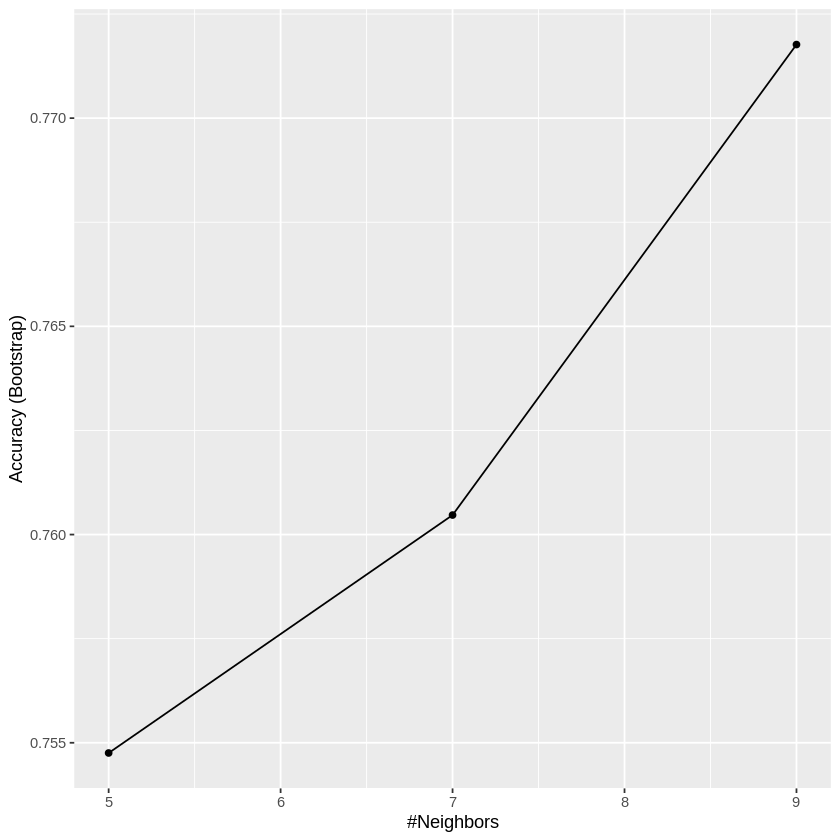

In [ ]:
ggplot(pengmodknn)

In [ ]:
# Testing K-Nearest Neighbour Classification Model
predknn= data.frame(Culmen.Depth= 9, Flipper.Length= 209)
predknn2= data.frame(Culmen.Depth= 19, Flipper.Length= 209)
predict(pengmodknn, predknn)

[1] Gentoo penguin (Pygoscelis papua)
3 Levels: Adelie Penguin (Pygoscelis adeliae) ...

In [ ]:
predict(pengmodknn, predknn2)

[1] Chinstrap penguin (Pygoscelis antarctica)
3 Levels: Adelie Penguin (Pygoscelis adeliae) ...

In [ ]:
pengmodknn1= train(Species~Culmen.Depth+Culmen.Length+Flipper.Length+Mass, penguin4, method= "knn")
pengmodknn$finalModel


9-nearest neighbor model
Training set outcome distribution:

      Adelie Penguin (Pygoscelis adeliae) 
                                      146 
Chinstrap penguin (Pygoscelis antarctica) 
                                       68 
        Gentoo penguin (Pygoscelis papua) 
                                      119 


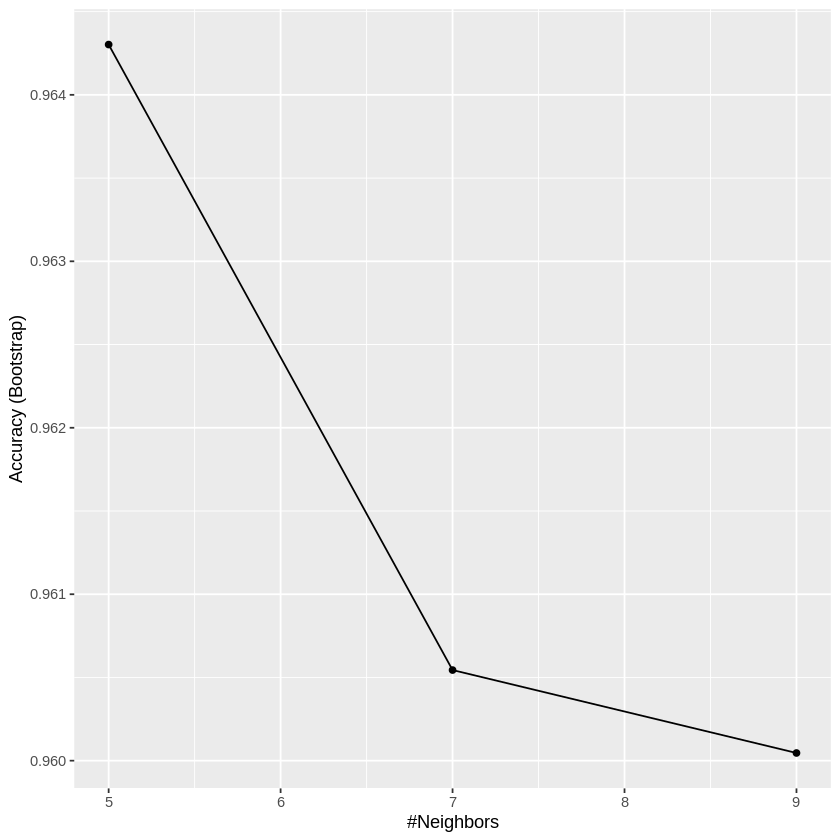

In [ ]:
ggplot(pengmodknn1)

In [ ]:
predknn1= data.frame(Culmen.Depth= 9, Flipper.Length= 209, Mass= 9.81, Culmen.Length= 45)
predict(pengmodknn, predknn1)

[1] Gentoo penguin (Pygoscelis papua)
3 Levels: Adelie Penguin (Pygoscelis adeliae) ...

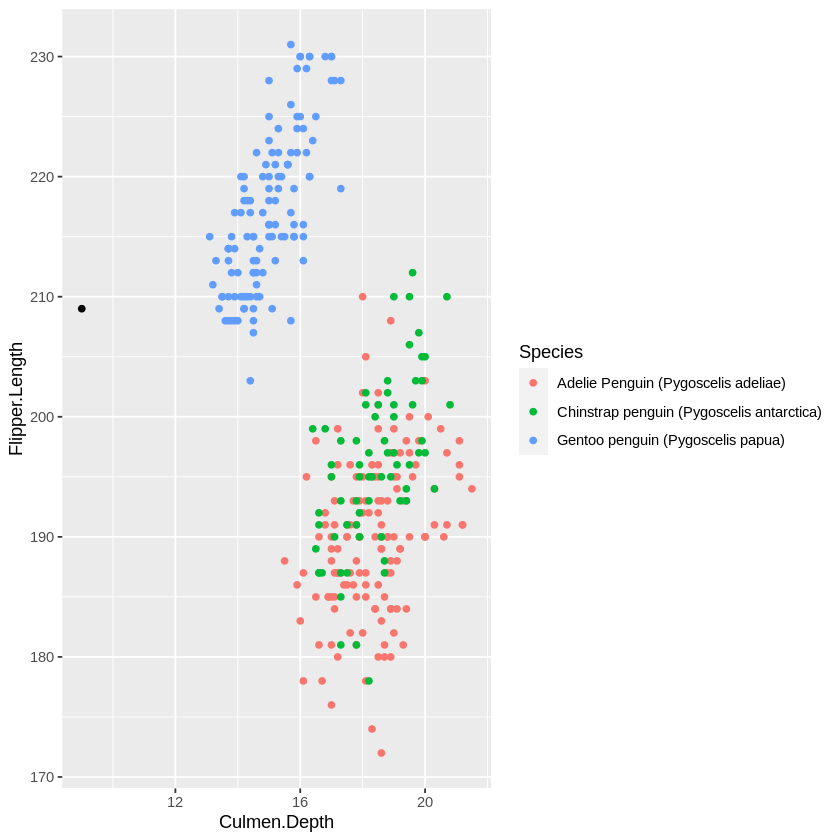

In [ ]:
penguin4%>%ggplot(aes(x= Culmen.Depth, y= Flipper.Length, color= Species))+geom_point()+geom_point(data= predknn, color= "black")

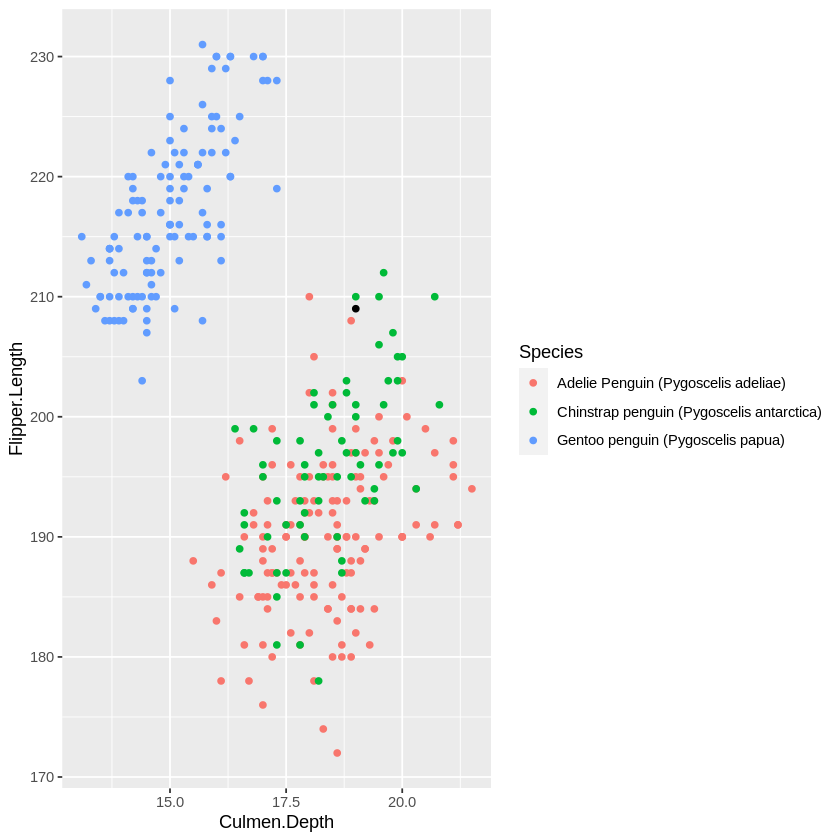

In [ ]:
penguin4%>%ggplot(aes(x= Culmen.Depth, y= Flipper.Length, color= Species))+geom_point()+geom_point(data= predknn2, color= "black")